In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR,LinearSVR
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [2]:
## Load the trainign data and test data
df_train=pd.read_csv("../data/training_data.csv")
df_test=pd.read_csv("../data/test_data.csv")

In [3]:
df_train.head()

,truckingcompanyid,productid,distanceinmiles,fuelcost,linehaulcost,source,destination
0,9343,2,3600.84,6.17,64.09,34,21
1,2363,23,1265.16,4.50,628.64,29,42
2,9634,23,486.60,5.52,351.30,42,6
3,5243,15,973.20,6.34,57.65,33,4
4,2149,20,2043.72,5.65,823.44,12,31


In [4]:
## Extracting Independent and Dependent features
X_columns=['truckingcompanyid','productid','distanceinmiles','fuelcost','source','destination']
y_columns=['linehaulcost']

## Loading the train and test data
X_train=df_train[X_columns]
y_train=df_train[y_columns]
X_test=df_test[X_columns]
y_test=df_test[y_columns]

## Implement Regression Models

In [5]:
Regressors_1 = [
    'KernelRidge','DecisionTreeRegressor', 'RandomForestRegressor','GradientBoostingRegressor','AdaBoostRegressor',
    'SVR', 'LinearSVR','PolynomialRegression']

In [6]:
%%time
Regressors = [
    KernelRidge(kernel='poly'),
    DecisionTreeRegressor(max_depth=3),
    RandomForestRegressor(n_estimators=5000,max_depth=3),
    GradientBoostingRegressor(n_estimators=5000,max_depth=3),
    AdaBoostRegressor(n_estimators=5000),
    SVR(gamma='auto'), 
    LinearSVR(),
    Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
    ]

name = []
test_score = []
models = []
test_rmse = []
train_rmse=[]
train_r2_score=[]
test_r2_score=[]
regsr=[]
i = 0
for regressor in Regressors:
    regressor.fit(X_train, y_train.linehaulcost)   
    name.append(Regressors_1[i] )
    train_r2_score.append(r2_score(y_train, regressor.predict(X_train)))
    test_r2_score.append(r2_score(y_test, regressor.predict(X_test)))
    test_score.append(regressor.score(X_test, y_test))
    train_rmse.append(np.sqrt(mean_squared_error(y_train,regressor.predict(X_train))))
    test_rmse.append(np.sqrt(mean_squared_error( y_test,regressor.predict(X_test))))
    i+=1

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Wall time: 4min 5s


C:\Users\pavan\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Comparing different models

In [7]:
scores=pd.DataFrame()
scores['name']=name
scores['train_r2score']=train_r2_score
scores['test_r2_score']=test_r2_score
scores['train_rmse']=train_rmse
scores['test_rmse']=test_rmse

In [8]:
scores

,name,train_r2score,test_r2_score,train_rmse,test_rmse
0,KernelRidge,0.251759,0.229987,1480.239261,1460.633638
1,DecisionTreeRegressor,0.515986,0.479908,1190.529032,1200.417740
2,RandomForestRegressor,0.534007,0.495481,1168.155434,1182.309812
3,GradientBoostingRegressor,0.977343,0.237870,257.579024,1453.138325
4,AdaBoostRegressor,0.490885,0.368879,1221.009552,1322.356681
5,SVR,-0.087536,-0.093927,1784.566964,1740.951209
6,LinearSVR,0.141602,0.133853,1585.460652,1549.131520
7,PolynomialRegression,0.394483,0.356548,1331.601393,1335.213077


In [9]:
#RF model
model_rf = RandomForestRegressor(n_estimators=5000, max_depth=3)
model_rf.fit(X_train, y_train.linehaulcost) 
pred_train_rf= model_rf.predict(X_train)
print(np.sqrt(mean_squared_error(y_train.linehaulcost,pred_train_rf)))
print(r2_score(y_train.linehaulcost, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test.linehaulcost,pred_test_rf)))
print(r2_score(y_test.linehaulcost, pred_test_rf))

1167.6676640994021
0.5343963765456108
1182.1226192384033
0.4956404646226551


## Features Importance

In [10]:
X_train.columns

Index(['truckingcompanyid', 'productid', 'distanceinmiles', 'fuelcost',
       'source', 'destination'],
      dtype='object')

In [11]:
pd.DataFrame(sorted(zip(X_train.columns,model_rf.feature_importances_)), columns=['Feature','Importance_Value'])\
            .sort_values('Importance_Value',ascending=False).reset_index(drop=True)

,Feature,Importance_Value
0,distanceinmiles,0.939694
1,fuelcost,0.017601
2,source,0.016010
3,truckingcompanyid,0.012867
4,productid,0.011396
5,destination,0.002433


<AxesSubplot:xlabel='distanceinmiles', ylabel='linehaulcost'>

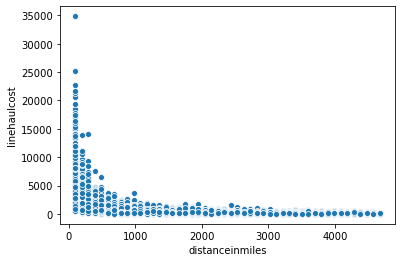

In [14]:
sns.scatterplot(x='distanceinmiles',y='linehaulcost',data=df_train)

## Residual Analysis

In [12]:
residuals=y_test.linehaulcost - model_rf.predict(X_test)
fitted_values=y_test.linehaulcost

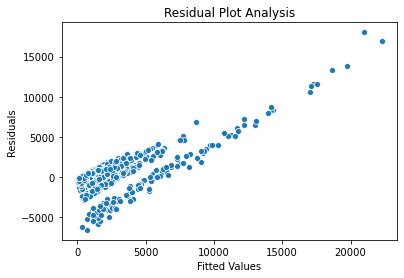

In [13]:
sns.scatterplot(x=fitted_values,y=residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot Analysis")
plt.show()